---------------------------------------------------------------------
# **Exploratory Data Analysis** #3

>***UC-Irvine Online Shoppers Purchasing Intention Dataset***
---------------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency

**Reading the dataset to Pandas dataframe**

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"
df_original = pd.read_csv (url)

#**Multivariate Analysis**

**In this section we will conduct multivariate analysis to derive business insights**

**_Duration vs. ExitRates vs. Revenue**

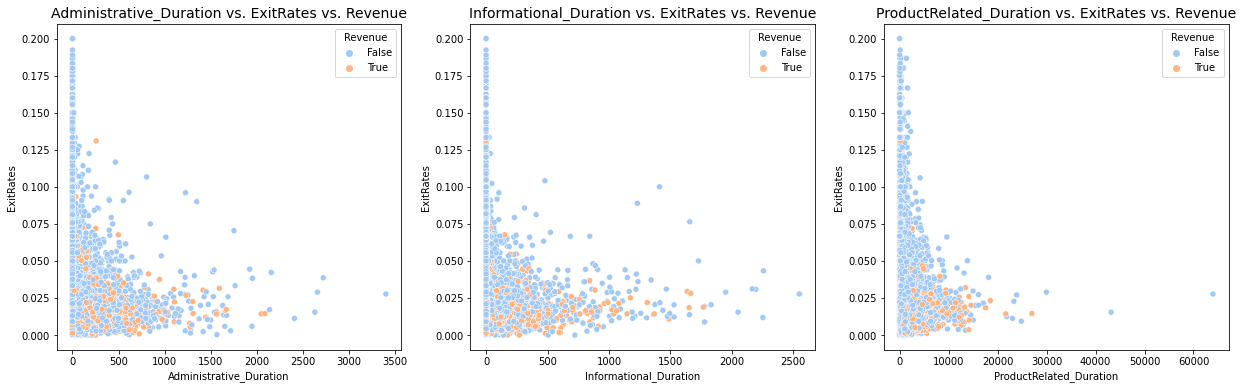

In [3]:
from numpy.ma.core import size
plt.figure(figsize=(21,6))

plt.subplot(131)
sns.scatterplot(x="Administrative_Duration", y="ExitRates", hue="Revenue", data=df_original , palette="pastel");
plt.xlabel('Administrative_Duration');
plt.ylabel('ExitRates');
plt.title("Administrative_Duration vs. ExitRates vs. Revenue", size=14);

plt.subplot(132)
sns.scatterplot(x="Informational_Duration", y="ExitRates", hue="Revenue", data=df_original , palette="pastel");
plt.xlabel('Informational_Duration');
plt.ylabel('ExitRates');
plt.title("Informational_Duration vs. ExitRates vs. Revenue", size=14);


plt.subplot(133)
sns.scatterplot(x="ProductRelated_Duration", y="ExitRates", hue="Revenue", data=df_original , palette="pastel");
plt.xlabel('ProductRelated_Duration');
plt.ylabel('ExitRates');
plt.title("ProductRelated_Duration vs. ExitRates vs. Revenue", size=14);

* Clearly, the lower exit rates and higher duration spent on pages, the more purchase is being made. We barely see any purchase in high exitRates and Low durations spent on any type of pages. 
* Please note the graphs don't have the same scale for x values. 

**_Duration vs. PageValues vs. VisitorType**

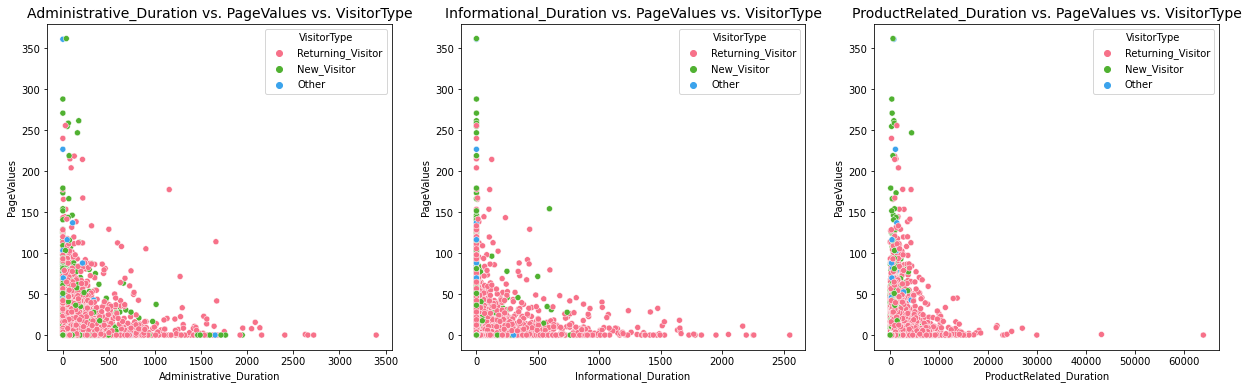

In [4]:
from numpy.ma.core import size
plt.figure(figsize=(21,6))


plt.subplot(131)
sns.scatterplot(x="Administrative_Duration", y="PageValues", hue="VisitorType", data=df_original, palette="husl");
plt.xlabel('Administrative_Duration');
plt.ylabel('PageValues');
plt.title("Administrative_Duration vs. PageValues vs. VisitorType", size=14);

plt.subplot(132)
sns.scatterplot(x="Informational_Duration", y="PageValues", hue="VisitorType", data=df_original , palette="husl");
plt.xlabel('Informational_Duration');
plt.ylabel('PageValues');
plt.title("Informational_Duration vs. PageValues vs. VisitorType", size=14);


plt.subplot(133)
sns.scatterplot(x="ProductRelated_Duration", y="PageValues", hue="VisitorType", data=df_original , palette="husl");
plt.xlabel('ProductRelated_Duration');
plt.ylabel('PageValues');
plt.title("ProductRelated_Duration vs. PageValues vs. VisitorType", size=14);

#**Highly Corrolated Independent Variables vs. Dependent Variable** 

**As mentioned in EDA2, we will explore further the highly corrolated attributes in relation to class label and decide which one of each pair to remove before the modelling.**

* **BounceRates vs. ExitRates vs. Revenue**

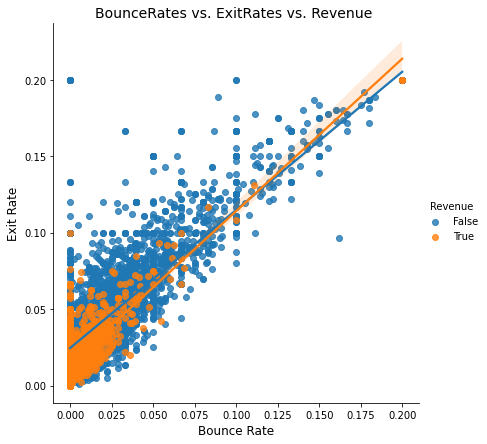

In [ ]:
#creating the chart
sns.lmplot(x="BounceRates", y= "ExitRates", hue= "Revenue",  data=df_original, height=6);

#setting the chart and axis labels
plt.xlabel("Bounce Rate", fontsize=12)
plt.ylabel("Exit Rate", fontsize=12)
plt.title("BounceRates vs. ExitRates vs. Revenue ", fontsize=14);

* No matter the outcome of "Revenue", the "BounceRates" and "ExitRates"are highly corrolated.This must be consider during model tuning. 

**Let's look at boxplot graph for each attribue in relation to class label "Revenue":**

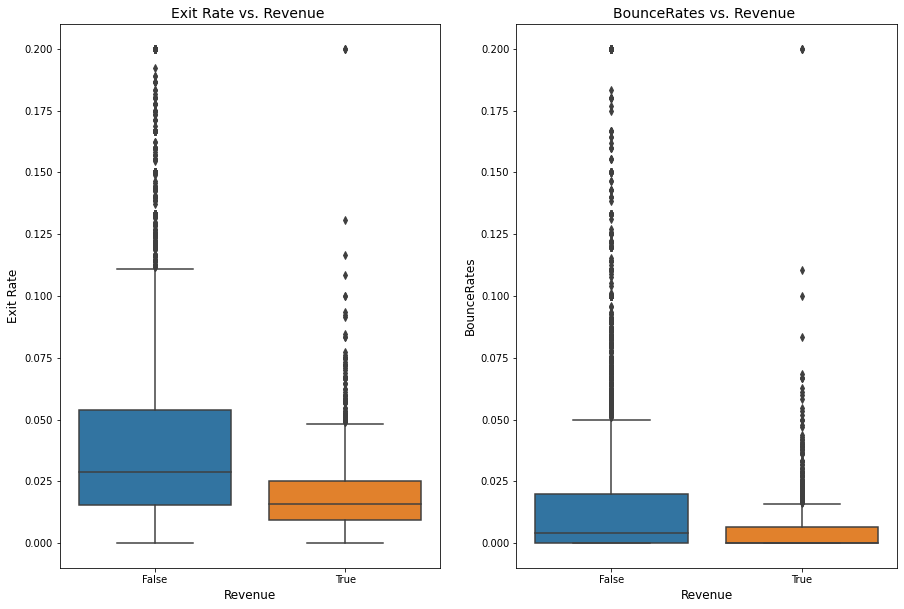

In [5]:
plt.figure(figsize = (15,10))

#using the first place holder for the first chart
plt.subplot(1,2,1)

#creating the chart
sns.boxplot(x="Revenue", y= "ExitRates",  data=df_original);

#setting the chart and axis labels
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Exit Rate", fontsize=12)
plt.title("Exit Rate vs. Revenue ", fontsize=14);

#using the first place holder for the first chart
plt.subplot(1,2,2)

#creating the chart
sns.boxplot(x="Revenue", y= "BounceRates",  data=df_original);

#setting the chart and axis labels
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("BounceRates", fontsize=12)
plt.title("BounceRates vs. Revenue ", fontsize=14);

* Definitely Exit Rate seems the better choice to be included in the modelling as it has higher variance. 

* **ProductRelated vs. ProductRelated_Duration vs. Revenue**

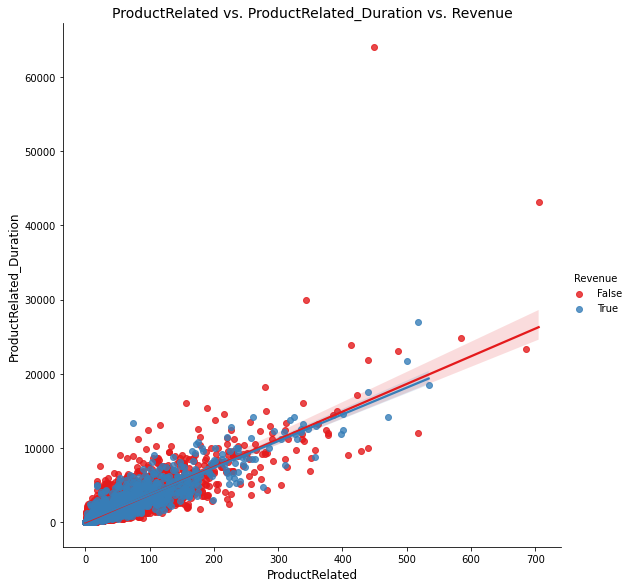

In [6]:

#creating the chart
sns.lmplot(x="ProductRelated", y= "ProductRelated_Duration", hue= "Revenue", palette= "Set1", data=df_original, height=8);

#setting the chart and axis labels
plt.xlabel("ProductRelated", fontsize=12)
plt.ylabel("ProductRelated_Duration", fontsize=12)
plt.title("ProductRelated vs. ProductRelated_Duration vs. Revenue", fontsize=14);

* No matter the outcome of "Revenue", the "ProductRelated" vs. "ProductRelated_Duration" are highly corrolated. This must also be consider during model tuning. 

**Let's look at boxplot graph for each attribue in relation to class label "Revenue":**

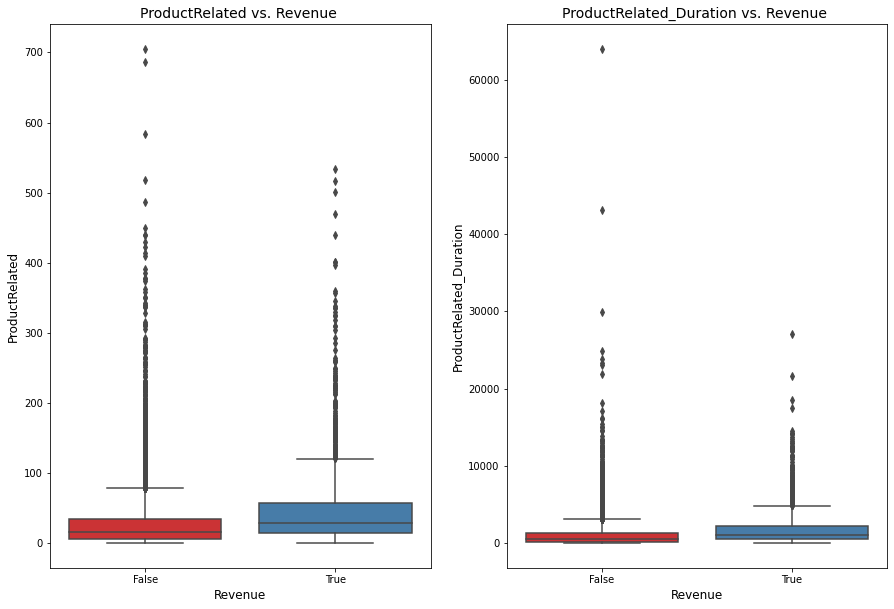

In [7]:
plt.figure(figsize = (15,10))

#using the first place holder for the first chart
plt.subplot(1,2,1)

#creating the chart
sns.boxplot(x="Revenue", y= "ProductRelated",  data=df_original, palette="Set1");

#setting the chart and axis labels
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("ProductRelated", fontsize=12)
plt.title("ProductRelated vs. Revenue ", fontsize=14);

#using the first place holder for the first chart
plt.subplot(1,2,2)

#creating the chart
sns.boxplot(x="Revenue", y= "ProductRelated_Duration",  data=df_original, palette="Set1");

#setting the chart and axis labels
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("ProductRelated_Duration", fontsize=12)
plt.title("ProductRelated_Duration vs. Revenue ", fontsize=14);

* ProductRelated seems the better choice to be included in the modelling as it has higher variance. 

# **Clustering**

In this section we will conduct clustering to extract information. 

In [8]:
#creating a copy of dataset
df_cluster= df_original.copy()



In [9]:

#using numerical columns only 
df_clusters=df_cluster.drop(columns = ["Month", "VisitorType", "Revenue", "Weekend"]) 

In [10]:
from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=2, random_state=0)
df_clusters['cluster'] = kmeans.fit_predict(df_clusters[['Administrative_Duration', 'ExitRates']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df_clusters['cen_x'] = df_clusters.cluster.map({0:cen_x[0], 1:cen_x[1]})
df_clusters['cen_y'] = df_clusters.cluster.map({0:cen_y[0], 1:cen_y[1]})
# define and map colors
colors = ['yellowgreen', 'darkred', 'deepskyblue']
df_clusters['c'] = df_clusters.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})


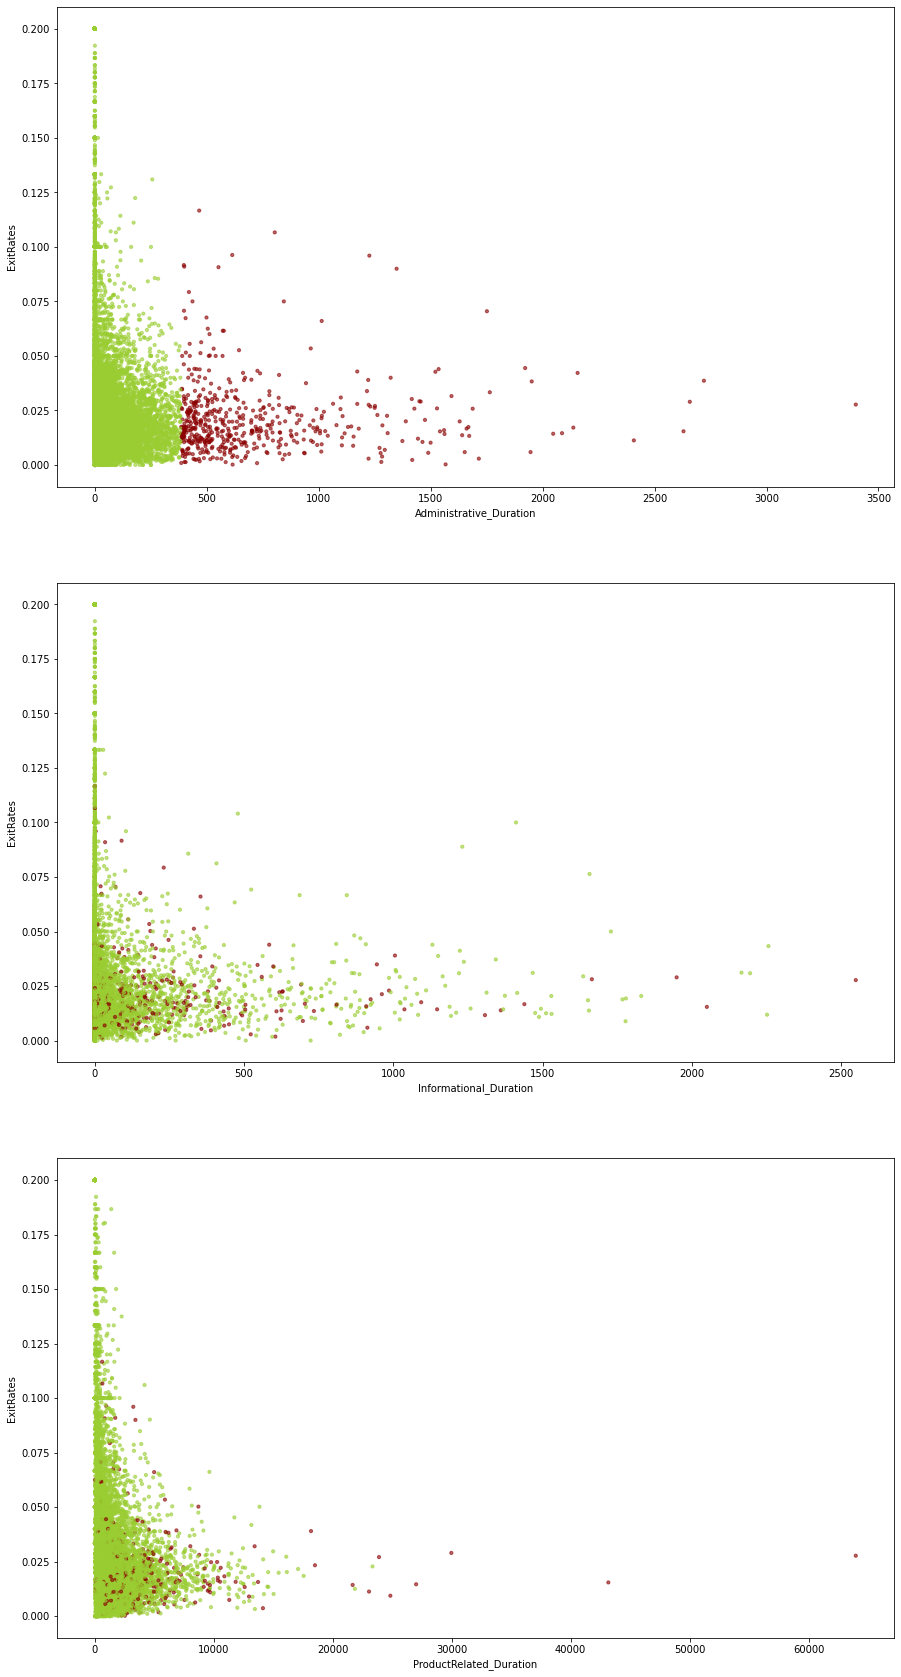

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,30))
# plotting the _duration vs Exitrates clusters
plt.subplot(3,1,1)

plt.scatter(df_clusters.Administrative_Duration, df_clusters.ExitRates, c=df_clusters.c, alpha = 0.6, s=10);

plt.xlabel('Administrative_Duration');
plt.ylabel('ExitRates');

plt.subplot(3,1,2)

plt.scatter(df_clusters.Informational_Duration, df_clusters.ExitRates, c=df_clusters.c, alpha = 0.6, s=10);

plt.xlabel('Informational_Duration');
plt.ylabel('ExitRates');

plt.subplot(3,1,3)

plt.scatter(df_clusters.ProductRelated_Duration, df_clusters.ExitRates, c=df_clusters.c, alpha = 0.6, s=10);

plt.xlabel('ProductRelated_Duration');
plt.ylabel('ExitRates');

* Administrative duration has distinguished clusters. Definitely the customers can be devided to "high" and "low" administrative duration in compared to their exite rates. However, for product related or inofrmational duration there is no such obvious distinguish!  

**Now, we will explore all type of page durations further by bringing a 3rd dimension "PageValues"**

* **Kmeans clustering model on 3 variables:**

            'Administrative_Duration', 'ExitRates', 'PageValues'



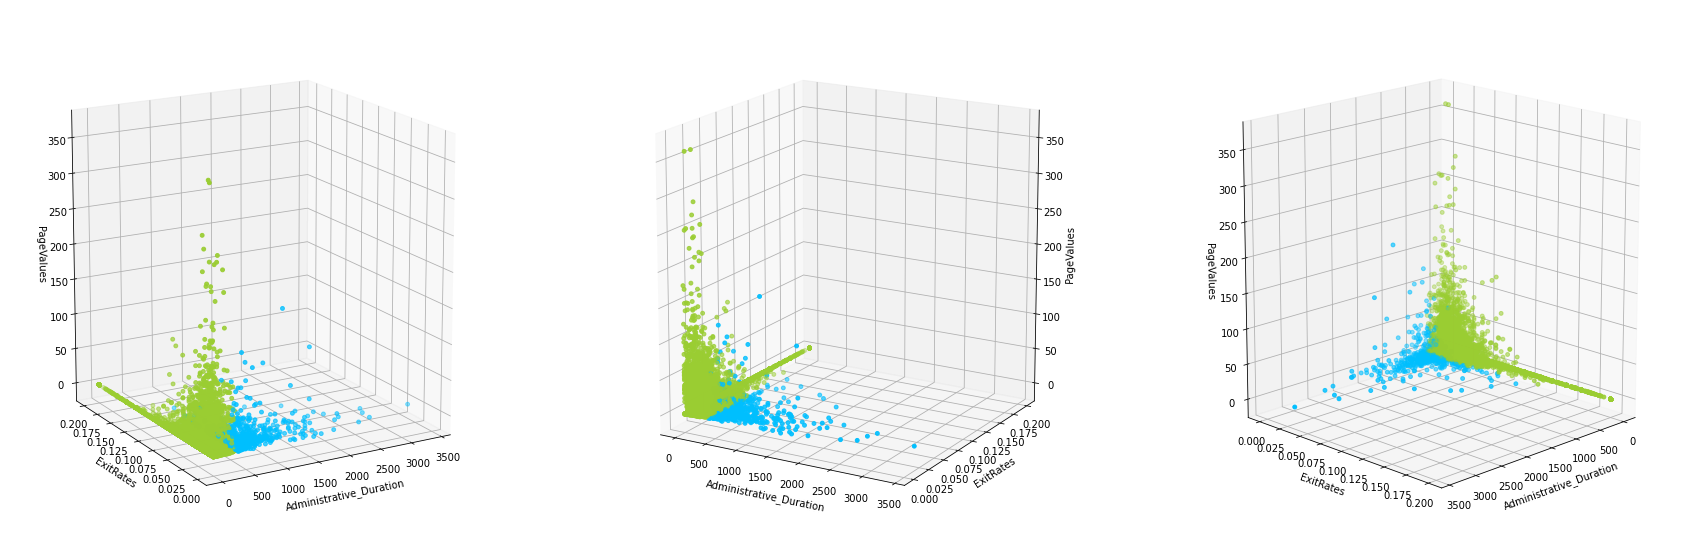

In [12]:
from mpl_toolkits.mplot3d import Axes3D
# Kmeans clustering model on 3 variables 
colors = ['yellowgreen', 'deepskyblue']
kmeans = KMeans(n_clusters=2, random_state=0)
df_clusters['cluster'] = kmeans.fit_predict(df_clusters[['Administrative_Duration', 'ExitRates', 'PageValues']])
df_clusters['c'] = df_clusters.cluster.map({0:colors[0], 1:colors[1]})

fig = plt.figure(figsize=(30, 10))


ax = fig.add_subplot(131, projection='3d')
ax.scatter(df_clusters.Administrative_Duration, df_clusters.ExitRates, df_clusters.PageValues, c=df_clusters.c, s=15)
ax.view_init( elev= 15, azim=-120)

ax.set_xlabel('Administrative_Duration')
ax.set_ylabel('ExitRates')
ax.set_zlabel('PageValues')

ax = fig.add_subplot(132, projection='3d')
ax.scatter(df_clusters.Administrative_Duration, df_clusters.ExitRates, df_clusters.PageValues, c=df_clusters.c, s=15)
ax.view_init( elev= 15)

ax.set_xlabel('Administrative_Duration')
ax.set_ylabel('ExitRates')
ax.set_zlabel('PageValues')

ax = fig.add_subplot(133, projection='3d')
ax.scatter(df_clusters.Administrative_Duration, df_clusters.ExitRates, df_clusters.PageValues, c=df_clusters.c, s=15)
ax.view_init( elev= 15, azim=45)


ax.set_xlabel('Administrative_Duration')
ax.set_ylabel('ExitRates')
ax.set_zlabel('PageValues')


plt.show()


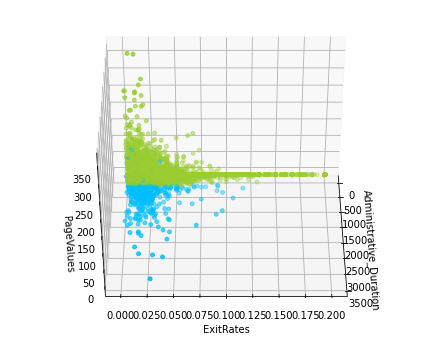

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from numpy.random import rand
from IPython.display import HTML
from matplotlib import animation
# this is a 3D video demonstration of the above clustering results
colors = ['yellowgreen', 'deepskyblue']
kmeans = KMeans(n_clusters=2, random_state=0)
df_clusters['cluster'] = kmeans.fit_predict(df_clusters[['Administrative_Duration', 'ExitRates', 'PageValues']])
df_clusters['c'] = df_clusters.cluster.map({0:colors[0], 1:colors[1]})
fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(df_clusters.Administrative_Duration, df_clusters.ExitRates, df_clusters.PageValues, c=df_clusters.c, s=15)

ax.set_xlabel('Administrative_Duration')
ax.set_ylabel('ExitRates')
ax.set_zlabel('PageValues')

def animate(frame):
  ax.view_init(40, frame/4)
  plt.pause(.001)
  return fig

anim = animation.FuncAnimation(fig, animate, frames=300, interval=50)
HTML(anim.to_html5_video())

* **Kmeans clustering model on 3 variables:**

            'Informational_Duration', 'ExitRates', 'PageValues'

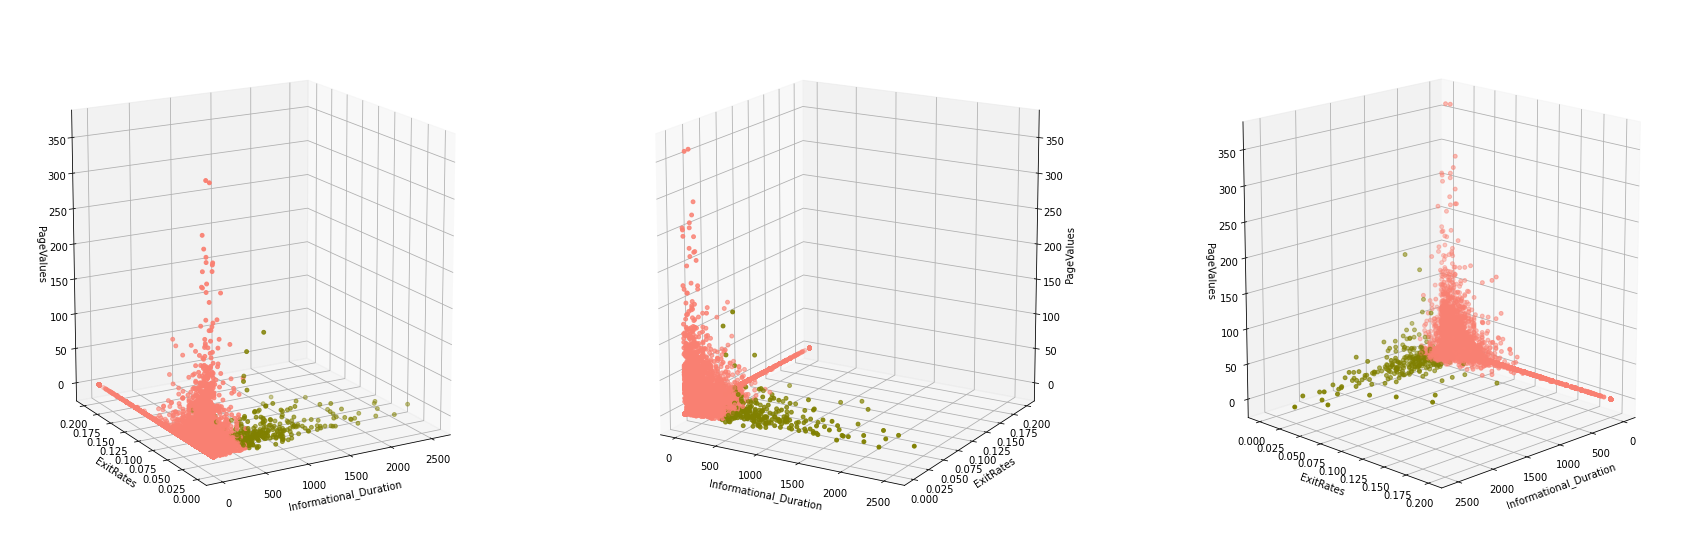

In [14]:
from mpl_toolkits.mplot3d import Axes3D

colors = ['salmon', 'olive']
kmeans = KMeans(n_clusters=2, random_state=0)
df_clusters['cluster'] = kmeans.fit_predict(df_clusters[['Informational_Duration', 'ExitRates', 'PageValues']])
df_clusters['c'] = df_clusters.cluster.map({0:colors[0], 1:colors[1]})

fig = plt.figure(figsize=(30, 10))


ax = fig.add_subplot(131, projection='3d')
ax.scatter(df_clusters.Informational_Duration, df_clusters.ExitRates, df_clusters.PageValues, c=df_clusters.c, s=15)
ax.view_init( elev= 15, azim=-120)

ax.set_xlabel('Informational_Duration')
ax.set_ylabel('ExitRates')
ax.set_zlabel('PageValues')

ax = fig.add_subplot(132, projection='3d')
ax.scatter(df_clusters.Informational_Duration, df_clusters.ExitRates, df_clusters.PageValues, c=df_clusters.c, s=15)
ax.view_init( elev= 15)

ax.set_xlabel('Informational_Duration')
ax.set_ylabel('ExitRates')
ax.set_zlabel('PageValues')

ax = fig.add_subplot(133, projection='3d')
ax.scatter(df_clusters.Informational_Duration, df_clusters.ExitRates, df_clusters.PageValues, c=df_clusters.c, s=15)
ax.view_init( elev= 15, azim=45)


ax.set_xlabel('Informational_Duration')
ax.set_ylabel('ExitRates')
ax.set_zlabel('PageValues')


plt.show()

* **Kmeans clustering model on 3 variables:**

            'ProductRelated_Duration', 'ExitRates', 'PageValues'**

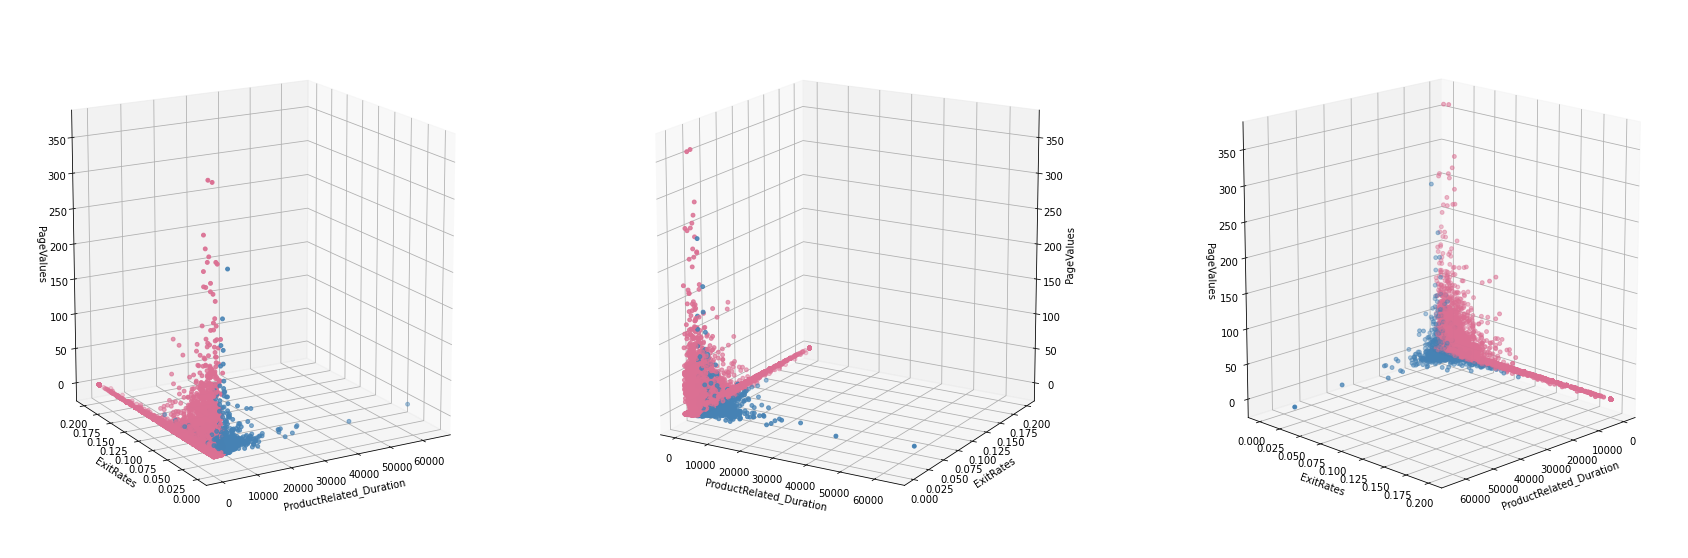

In [15]:
from mpl_toolkits.mplot3d import Axes3D

colors = ['palevioletred', 'steelblue']
kmeans = KMeans(n_clusters=2, random_state=0)
df_clusters['cluster'] = kmeans.fit_predict(df_clusters[['ProductRelated_Duration', 'ExitRates', 'PageValues']])
df_clusters['c'] = df_clusters.cluster.map({0:colors[0], 1:colors[1]})

fig = plt.figure(figsize=(30, 10))


ax = fig.add_subplot(131, projection='3d')
ax.scatter(df_clusters.ProductRelated_Duration, df_clusters.ExitRates, df_clusters.PageValues, c=df_clusters.c, s=15)
ax.view_init( elev= 15, azim=-120)

ax.set_xlabel('ProductRelated_Duration')
ax.set_ylabel('ExitRates')
ax.set_zlabel('PageValues')

ax = fig.add_subplot(132, projection='3d')
ax.scatter(df_clusters.ProductRelated_Duration, df_clusters.ExitRates, df_clusters.PageValues, c=df_clusters.c, s=15)
ax.view_init( elev= 15)

ax.set_xlabel('ProductRelated_Duration')
ax.set_ylabel('ExitRates')
ax.set_zlabel('PageValues')

ax = fig.add_subplot(133, projection='3d')
ax.scatter(df_clusters.ProductRelated_Duration, df_clusters.ExitRates, df_clusters.PageValues, c=df_clusters.c, s=15)
ax.view_init( elev= 15, azim=45)


ax.set_xlabel('ProductRelated_Duration')
ax.set_ylabel('ExitRates')
ax.set_zlabel('PageValues')


plt.show()

**Note: There are 3 notebooks containing EDA. Please check out the EDA 1 & 2.**